In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
def cross_val(model, x, y, cv = 5, fit_params = None):
    """
    It prints the mean of cross_val_score

    """
    from sklearn.model_selection import cross_val_score
    print(type(model))
    score = cross_val_score(model, x, y, cv = cv, n_jobs = -1, fit_params = fit_params)
    print(score)
    print("mean of cross val score:")
    print(np.mean(score))
    print("95% confidence interval:")
    print("lower:",np.mean(score) - 2*np.std(score),'upper:',np.mean(score) + 2*np.std(score))
    print()
    print()

In [16]:
training_data = pd.read_csv("/Users/coledixon/Documents/ml-project/training data.csv")
x_train = training_data.iloc[:,1:-1]
y_train = training_data.iloc[:,-1]

gra_clf = Pipeline([
    ("Scaler", StandardScaler()),
    ("gra_clf", GradientBoostingClassifier(n_estimators = 400, learning_rate=1.0, max_depth=1, random_state=0))
])

cross_val(gra_clf, x_train, y_train)

<class 'sklearn.pipeline.Pipeline'>
[0.95698925 0.94609164 0.9703504  0.9541779  0.95687332]
mean of cross val score:
0.9568965017534706
95% confidence interval:
lower: 0.9412721006129582 upper: 0.9725209028939831




In [17]:
test_data = pd.read_csv("/Users/coledixon/Documents/ml-project/testing data.csv")
x_test = test_data.iloc[:,1:-1]
y_test = test_data.iloc[:,-1]

gra_clf.fit(x_train,y_train)
y_pred = gra_clf.predict(x_test)

print(np.sum(y_pred == y_test)/len(y_pred))

0.9723618090452262


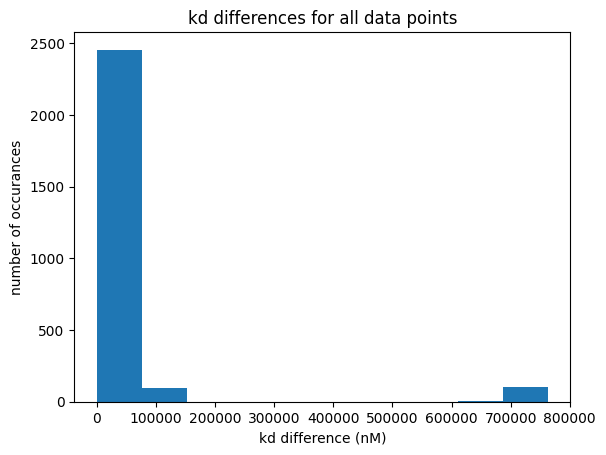

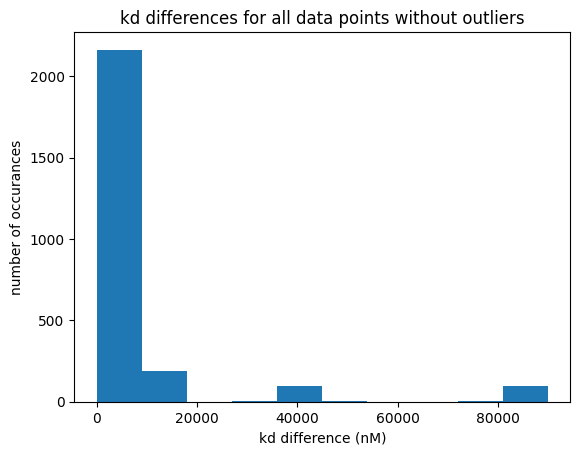

In [18]:
diff = pd.read_csv("KD differences.csv")
avg_kd_diff = np.mean(diff["kd difference"])
std_kd_diff = np.std(diff["kd difference"])
med_kd_diff = np.median(diff["kd difference"])
plt.hist(diff["kd difference"])
plt.xlabel("kd difference (nM)")
plt.ylabel("number of occurances")
plt.title("kd differences for all data points")
plt.show()
diff_wo_outliers = diff[diff["kd difference"] > (avg_kd_diff-2*std_kd_diff)]
diff_wo_outliers =  diff[diff_wo_outliers["kd difference"] < (avg_kd_diff+2*std_kd_diff)]
plt.hist(diff_wo_outliers["kd difference"])
plt.xlabel("kd difference (nM)")
plt.ylabel("number of occurances")
plt.title("kd differences for all data points without outliers")
plt.show()
avg_kd_diff_no_outliers = np.mean(diff_wo_outliers["kd difference"])

In [19]:
diff.loc[np.argmax(diff["kd difference"])]

Unnamed: 0              1253
PDB codes        2l41 , 3moj
kd difference     762999.946
Name: 1253, dtype: object

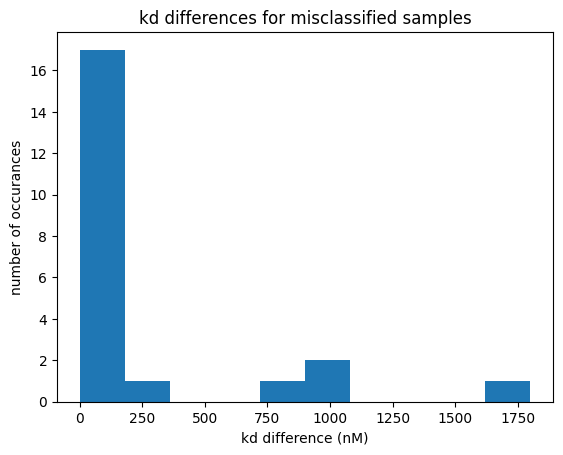

average kd difference for false predictions: 225.60181818181817 
average kd difference for all data points: 35734.58562292609 
average kd difference for all data points without outliers: 6789.650023529412 
median kd difference for false predictions: 11.95 
median kd difference for all data points: 493.68


In [20]:
temp = test_data.merge(diff)
false_pred = temp[temp["Output"] != y_pred]
plt.hist(false_pred["kd difference"])
plt.xlabel("kd difference (nM)")
plt.ylabel("number of occurances")
plt.title("kd differences for misclassified samples")
plt.show()
avg_false_kd_diff = np.mean(false_pred["kd difference"])
med_false_kd_diff = np.median(false_pred["kd difference"])
print("average kd difference for false predictions:",avg_false_kd_diff,
      "\naverage kd difference for all data points:",avg_kd_diff,
      "\naverage kd difference for all data points without outliers:",avg_kd_diff_no_outliers,
      "\nmedian kd difference for false predictions:",med_false_kd_diff,
      "\nmedian kd difference for all data points:",med_kd_diff,)

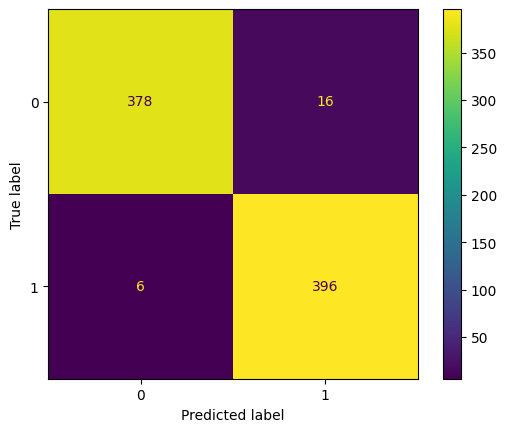

In [21]:
#confusion matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix)
disp.plot()
plt.show()

In [26]:
#final ranking
#rank the complexes based off of the number of 1's that they have
all_data = pd.read_csv("features_outputs.csv")
gra_clf.fit(x_train,y_train) #fit to our training data
y_pred = gra_clf.predict(all_data.iloc[ : , 1:-1]) #predict labels for all of the data points
all_data['prediction'] = y_pred
number_of_ones_pred = {}
for i, row in all_data.iterrows():
    curr_code = row["PDB codes"].split()[0]
    if  curr_code not in number_of_ones_pred:
        number_of_ones_pred[curr_code] = 0
    if row["prediction"] == 1:
        number_of_ones_pred[curr_code] += 1
number_of_ones_pred = dict(sorted(number_of_ones_pred.items(), key=lambda item: item[1]))
pred_ranking = list(number_of_ones_pred.keys())

number_of_ones_actual = {}
for i, row in all_data.iterrows():
    curr_code = row["PDB codes"].split()[0]
    if  curr_code not in number_of_ones_actual:
        number_of_ones_actual[curr_code] = 0
    if row["Output"] == 1:
        number_of_ones_actual[curr_code] += 1
number_of_ones_actual = dict(sorted(number_of_ones_actual.items(), key=lambda item: item[1]))
actual_ranking = list(number_of_ones_actual.keys())


,predicted,actual
0,2l41,2l41
1,2kh9,2kh9
2,2kkf,2kkf
3,2gkd,2mki
4,2mki,2gkd
5,1il2,5ytt
6,5ytt,1il2
7,5yts,5yts
8,5ytx,1zzi
9,1zzi,2mkk


In [30]:
def highlight_incorrect(val):
    print(val)
    i = pred_ranking.index(val)
    j = actual_ranking.index(val)

    r = 0
    g = 255 * (1-(abs(i-j)/len(pred_ranking)))
    b = 0

    return f'background-color: rgb({r},{g},{b})'



df = pd.DataFrame({"predicted":pred_ranking,"actual":actual_ranking})
df.style.apply(highlight_incorrect)

0     2l41
1     2kh9
2     2kkf
3     2gkd
4     2mki
5     1il2
6     5ytt
7     5yts
8     5ytx
9     1zzi
10    2mkk
11    5ytv
12    1rkj
13    4hid
14    1jbr
15    1wwd
16    5wwe
17    2leb
18    2lec
19    5wwg
20    1s03
21    1wwe
22    3rn2
23    5wzk
24    4pdb
25    1wwg
26    1u6p
27    1wwf
28    1knz
29    1omh
30    1osb
31    4hj5
32    5z6z
33    4him
34    5wzg
35    2b6g
36    2glo
37    4hik
38    4hio
39    4hj8
40    1exd
41    4hj7
42    5wzj
43    2err
44    2la5
45    2kx5
46    6eo6
47    1s40
48    1u63
49    6eo7
50    1je8
51    3moj
Name: predicted, dtype: object


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().